## Demographic Prediction from Location

#### Read the data from source and sort all events in ascending order of occurrence

In [1]:
# Import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import mplleaflet, pydotplus
from math import radians, cos, sin, asin, sqrt
from ibmgeohashpy import geohash
import numpy as np
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import ListedColormap
import os, sys, json, re, itertools, warnings, folium
from matplotlib import animation
from IPython.display import Image
%matplotlib inline
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
warnings.filterwarnings('ignore')
print('Libraries imported..')

Libraries imported..


In [2]:
events = pd.read_csv('./data/events.csv')
events['timestamp'] = pd.to_datetime(events['timestamp'])
events['year'] = events.timestamp.apply(lambda x: x.year)
events['month'] = events.timestamp.apply(lambda x: x.month)

In [3]:
events.shape

(3252950, 7)

In [4]:
events_within_china = pd.read_csv('./data/events_within_china.csv')
events_within_china.shape

(2202582, 6)

In [6]:
events_within_china.head()

Unnamed: 0  event_id            device_id            timestamp  longitude  \
0           0         1    29182687948017175  2016-05-01 00:55:25     121.38   
1           1         2 -6401643145415154744  2016-05-01 00:54:12     103.65   
2           2         3 -4833982096941402721  2016-05-01 00:08:05     106.60   
3           3         4 -6815121365017318426  2016-05-01 00:06:40     104.27   
4           4         5 -5373797595892518570  2016-05-01 00:07:18     115.88   

   latitude  
0     31.24  
1     30.97  
2     29.70  
3     23.28  
4     28.66

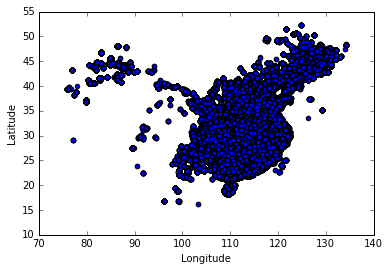

In [11]:
plt.scatter(events_within_china['longitude'],events_within_china['latitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [7]:
events['device_id'].unique().shape

(60865,)

#### TalkingData Schema

In [11]:
Image(url='./talkingdata_schema.jpeg')

#### Read the data for events , apps and phone brands

In [6]:
events = pd.read_csv('./data/events.csv')
app_events = pd.read_csv('./data/app_events.csv')
app_labels = pd.read_csv('./data/app_labels.csv')
label_categories = pd.read_csv('./data/label_categories.csv')
phone_brand = pd.read_csv('./data/phone_brand_device_model.csv',encoding='utf-8')
english_phone_brands_mapping = {
    "三星": "samsung",
    "天语": "Ktouch",
    "海信": "hisense",
    "联想": "lenovo",
    "欧比": "obi",
    "爱派尔": "ipair",
    "努比亚": "nubia",
    "优米": "youmi",
    "朵唯": "dowe",
    "黑米": "heymi",
    "锤子": "hammer",
    "酷比魔方": "koobee",
    "美图": "meitu",
    "尼比鲁": "nibilu",
    "一加": "oneplus",
    "优购": "yougo",
    "诺基亚": "nokia",
    "糖葫芦": "candy",
    "中国移动": "ccmc",
    "语信": "yuxin",
    "基伍": "kiwu",
    "青橙": "greeno",
    "华硕": "asus",
    "夏新": "panosonic",
    "维图": "weitu",
    "艾优尼": "aiyouni",
    "摩托罗拉": "moto",
    "乡米": "xiangmi",
    "米奇": "micky",
    "大可乐": "bigcola",
    "沃普丰": "wpf",
    "神舟": "hasse",
    "摩乐": "mole",
    "飞秒": "fs",
    "米歌": "mige",
    "富可视": "fks",
    "德赛": "desci",
    "梦米": "mengmi",
    "乐视": "lshi",
    "小杨树": "smallt",
    "纽曼": "newman",
    "邦华": "banghua",
    "E派": "epai",
    "易派": "epai",
    "普耐尔": "pner",
    "欧新": "ouxin",
    "西米": "ximi",
    "海尔": "haier",
    "波导": "bodao",
    "糯米": "nuomi",
    "唯米": "weimi",
    "酷珀": "kupo",
    "谷歌": "google",
    "昂达": "ada",
    "聆韵": "lingyun",
    "小米": "Xiaomi",
    "华为": "Huawei",
    "魅族": "Meizu",
    "中兴": "ZTE",
    "酷派": "Coolpad",
    "金立": "Gionee",
    "SUGAR": "SUGAR",
    "OPPO": "OPPO",
    "vivo": "vivo",
    "HTC": "HTC",
    "LG": "LG",
    "ZUK": "ZUK",
    "TCL": "TCL",
    "LOGO": "LOGO",
    "SUGAR": "SUGAR",
    "Lovme": "Lovme",
    "PPTV": "PPTV",
    "ZOYE": "ZOYE",
    "MIL": "MIL",
    "索尼" : "Sony",
    "欧博信" : "Opssom",
    "奇酷" : "Qiku",
    "酷比" : "CUBE",
    "康佳" : "Konka",
    "亿通" : "Yitong",
    "金星数码" : "JXD",
    "至尊宝" : "Monkey King",
    "百立丰" : "Hundred Li Feng",
    "贝尔丰" : "Bifer",
    "百加" : "Bacardi",
    "诺亚信" : "Noain",
    "广信" : "Kingsun",
    "世纪天元" : "Ctyon",
    "青葱" : "Cong",
    "果米" : "Taobao",
    "斐讯" : "Phicomm",
    "长虹" : "Changhong",
    "欧奇" : "Oukimobile",
    "先锋" : "XFPLAY",
    "台电" : "Teclast",
    "大Q" : "Daq",
    "蓝魔" : "Ramos",
    "奥克斯" : "AUX",
    "飞利浦": "Philips",
    "智镁": "Zhimei",
    "惠普": "HP",
    "原点": "Origin",
    "戴尔": "Dell",
    "碟米": "Diemi",
    "西门子": "Siemens",
    "亚马逊": "Amazon",
    "宏碁": "Acer"
}

phone_brand.phone_brand = phone_brand.phone_brand.map(pd.Series(english_phone_brands_mapping), na_action='ignore')

#### Plot the data and visualise the spatial distribution of the events

In [6]:
print ('Total no of events =',events.shape[0]) # 3.25 million events
events.head()

Total no of events = 3252950


event_id            device_id            timestamp  longitude  latitude
0         1    29182687948017175  2016-05-01 00:55:25     121.38     31.24
1         2 -6401643145415154744  2016-05-01 00:54:12     103.65     30.97
2         3 -4833982096941402721  2016-05-01 00:08:05     106.60     29.70
3         4 -6815121365017318426  2016-05-01 00:06:40     104.27     23.28
4         5 -5373797595892518570  2016-05-01 00:07:18     115.88     28.66

In [10]:
events['device_id'].unique().shape

(60865,)

In [13]:
# Use Leaflet to visualise frequency of occurrence of the events by geographic location
plt.figure(figsize=(15,10))
plt.hold(True)
plt.plot(events.longitude[0:1000],events.latitude[0:1000],'rs')
mplleaflet.show()

#### The data is comparatively denser in and around China so we filter the events within the Bounding Box for China

In [7]:
# Sample it down to only the China region

lon_min, lon_max = 75, 135
lat_min, lat_max = 15, 55

# filter out those events triggered outside of China
events_within_china = events.query('longitude <= %d & %d <= longitude & latitude <= %d & %d <= latitude' %
                      (lon_max, lon_min, lat_max, lat_min))
print ('No. of events within China =', events_within_china.shape) # 2.2 million
max_lon = max(events_within_china.longitude)
min_lon = min(events_within_china.longitude)
max_lat = max(events_within_china.latitude)
min_lat = min(events_within_china.latitude)
print('Bounding box for China: \n(',max_lon,max_lat,min_lon,min_lat,')')

No. of events within China = (2202582, 5)
Bounding box for China: 
( 134.3 52.33 75.86 16.24 )


In [11]:
events_within_china.to_csv('./data/events_within_china.csv')

In [5]:
events_china_grouped = events_within_china.groupby('device_id')
len(events_china_grouped)

29593

In [13]:
events_within_china['timestamp'] = pd.to_datetime(events_within_china.timestamp)
events_within_china['year'] = events_within_china.timestamp.apply(lambda x: x.year)
events_within_china['month'] = events_within_china.timestamp.apply(lambda x: x.month)
events_within_china['day'] = events_within_china.timestamp.apply(lambda x: x.day)
events_within_china['hour'] = events_within_china.timestamp.apply(lambda x: x.hour)

In [26]:
events_within_china['hour'] = events_within_china.timestamp.apply(lambda x: x.hour)

In [38]:
df_hour = events_within_china.groupby(['hour']).count()
df_hour.head()

Unnamed: 0  event_id  device_id  timestamp  longitude  latitude   year  \
hour                                                                           
0          83996     83996      83996      83996      83996     83996  83996   
1          50041     50041      50041      50041      50041     50041  50041   
2          37060     37060      37060      37060      37060     37060  37060   
3          32041     32041      32041      32041      32041     32041  32041   
4          30181     30181      30181      30181      30181     30181  30181   

      month    day  
hour                
0     83996  83996  
1     50041  50041  
2     37060  37060  
3     32041  32041  
4     30181  30181

<Container object of 24 artists>

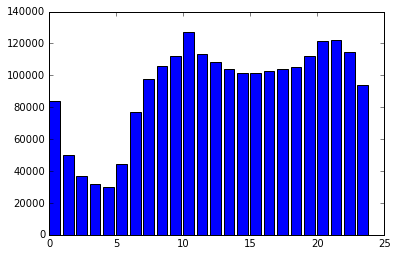

In [40]:
plt.bar(df_hour.index,df_hour.event_id)

In [41]:
df_day = events_within_china.groupby(['day']).count()
df_day.head()

Unnamed: 0  event_id  device_id  timestamp  longitude  latitude    year  \
day                                                                            
1        301868    301868     301868     301868     301868    301868  301868   
2        307600    307600     307600     307600     307600    307600  307600   
3        330457    330457     330457     330457     330457    330457  330457   
4        325046    325046     325046     325046     325046    325046  325046   
5        323940    323940     323940     323940     323940    323940  323940   

      month    hour  
day                  
1    301868  301868  
2    307600  307600  
3    330457  330457  
4    325046  325046  
5    323940  323940

<Container object of 9 artists>

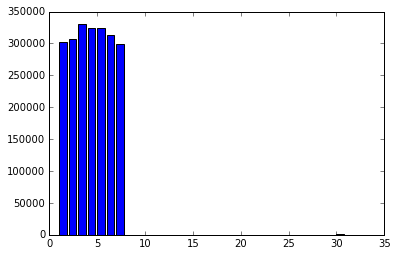

In [42]:
plt.bar(df_day.index,df_day.event_id)

In [44]:
events_within_china['min'] = events_within_china.timestamp.apply(lambda x: x.minute)
df_min = events_within_china.groupby(['min']).count()
df_min.head()

Unnamed: 0  event_id  device_id  timestamp  longitude  latitude   year  \
min                                                                           
0         39426     39426      39426      39426      39426     39426  39426   
1         38406     38406      38406      38406      38406     38406  38406   
2         37835     37835      37835      37835      37835     37835  37835   
3         37915     37915      37915      37915      37915     37915  37915   
4         38088     38088      38088      38088      38088     38088  38088   

     month    day   hour  
min                       
0    39426  39426  39426  
1    38406  38406  38406  
2    37835  37835  37835  
3    37915  37915  37915  
4    38088  38088  38088

<Container object of 60 artists>

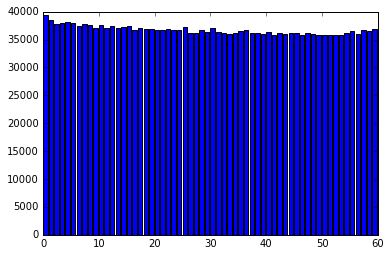

In [47]:
plt.bar(df_min.index,df_min.event_id)

<Container object of 60 artists>

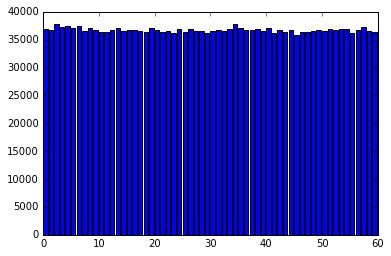

In [48]:
events_within_china['sec'] = events_within_china.timestamp.apply(lambda x: x.second)
df_sec = events_within_china.groupby(['sec']).count()
plt.bar(df_sec.index,df_sec.event_id)

In [ ]:
df_timestamp = events_within_china.groupby('timestamp').count()
plt.plot(df_timestamp.index,df_timestamp.event_id)

<Container object of 567118 artists>

In [ ]:
# Combine additional features like app_id, app_labels, phone_brand etc
app_events_china = events_within_china.merge(app_events,how='inner',on='event_id')
app_label_categories = app_labels.merge(label_categories, on = 'label_id', how = 'inner')
app_events_labels_china = app_events_china.merge(app_label_categories, on = 'app_id', how = 'inner')
final_events_china = app_events_labels_china.merge(phone_brand, on = 'device_id', how = 'inner')
final_events_china.head()

In [ ]:
app_labels_china = app_events_china.merge(app_labels, on='app_id', how = 'inner')
app_labels_china.head()

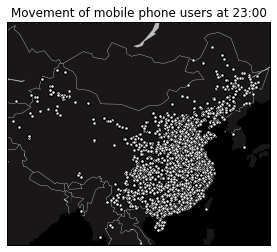

In [8]:
# Functions to animate the gps movement data
def init():
    point.set_data([], [])
    return point,

def animate(i):
    lon = time_groups.get_group(i)['longitude'].values
    lat = time_groups.get_group(i)['latitude'].values
    x, y = m(lon ,lat)
    point.set_data(x,y)
    plt.title('Movement of mobile phone users at %2d:00' % (i))
    return point,

# Sample the events within china and animate the GPS movements by hour
times = pd.DatetimeIndex(events_within_china['timestamp'])
time_groups = events_within_china.groupby(times.hour)

map1 = Basemap(projection='merc',
             llcrnrlat=lat_min,
             urcrnrlat=lat_max,
             llcrnrlon=lon_min,
             urcrnrlon=lon_max,
             lat_ts=0,
             resolution='c')

map1.fillcontinents(color='#191717',lake_color='#bdbdbd') 
map1.drawmapboundary(fill_color='#000000')                
map1.drawcountries(linewidth=0.3, color="w")     

m = map1
x,y = m(0, 0)
point = m.plot(x, y, 'o', markersize=3, color='white')[0]

output = animation.FuncAnimation(plt.gcf(), animate, 
                                 init_func=init, frames=24, 
                                 interval=500, blit=True, repeat=False)
output.save('one-day-in-china.gif', writer='imagemagick')

Image(url= './one-day-in-china.gif')

#### We compute length of the trajectories and their bearing for all events per device in sequential manner

No of groups by device_id within China having a traj_len above 5km: 932

No of device groups with atleast 150 data points : 10

List of devices : [-9190825597212946223, -9173774246501780929, -9154058956133567978, -9137123892151396745, -9093812922411006100, -9091167162131305309, -9048283859724776814, -8972483106221612558, -8962763052150224262, -8947485515402652920] ....


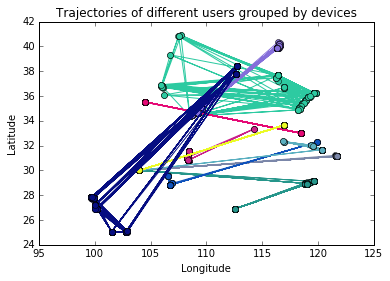

In [19]:
def haversine(lon1, lat1, lon2, lat2):
    """
    Function to calculate the great circle distance in kilometers
    between two points on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

def bearing(lon1,lat1,lon2,lat2):
    """
    Function to calculate the bearing in degrees
    between two points on the earth (specified in decimal degrees)
    """
    bearing = atan2(sin(lon2-lon1)*cos(lat2), cos(lat1)*sin(lat2)-sin(lat1)*cos(lat2)*cos(long2-long1))
    bearing = degrees(bearing)
    bearing = (bearing + 360) % 360
    
# This part is to be executed only once

'''
grouped = events_within_china.groupby('device_id')
devices, traj_len, duration = [],[],[]
radius = 6371 # Earth's radius in kilometres
for name,group in grouped:
    df = pd.DataFrame(grouped.get_group(name).sort('timestamp'))
    devices.append(name)
    len1 = 0
    latitude = df.latitude.tolist()
    longitude = df.longitude.tolist()
    for i in range(0,len(df)-1):
        #Calculate length of the trajectory for each device
        dist = haversine(longitude[i],latitude[i],longitude[i+1],latitude[i+1])
        len1 = len1 + dist
    traj_len.append(len1)
       
device_traj = pd.DataFrame({'device_id':devices,'traj_len_km':traj_len})
device_traj = device_traj.query('traj_len_km > 5')
df = events_within_china.merge(device_traj, on = 'device_id', how = 'inner')
def encode_coords(x):
    return geohash.encode(x['latitude'],x['longitude'])
df['geohash'] = df.apply(encode_coords, axis = 1)
df.to_csv('./data/devices_traj_len_more_than_5_km')
'''
    
%matplotlib inline
df = pd.read_csv('./data/devices_traj_len_more_than_5_km')
x = df.query('traj_len_km>2000')
device_groups = x.groupby('device_id')
print('No of groups by device_id within China having a traj_len above 5km:',len(device_groups))
# Number of people to show : We dispay 10% of the total data
i = len(device_groups)*0.01
# Threshold of number of data points for person to be included (excluding 0,0s)
thresh = 150
j = 0
device = []
#plt.figure(figsize=(10,7)) 
for g in device_groups:
    device.append(g[0])
    g = g[1]
    if g.shape[0] > thresh:
        j +=1
        lon = g['longitude']
        lat = g['latitude']
        plt.plot(lon, lat, '-o', color=np.random.rand(3).tolist())
        i -= 1
        #
    if i < 0:
        break
print('\nNo of device groups with atleast', thresh, 'data points :',j)    
print('\nList of devices :',device[0:10],'....')
plt.title('Trajectories of different users grouped by devices')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('gps_traj_map.png')
plt.show()

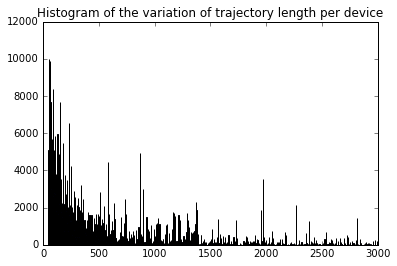

In [18]:
% matplotlib inline
plt.hist(df['traj_len_km'], bins = range(50,3000))
plt.title('Histogram of the variation of trajectory length per device')

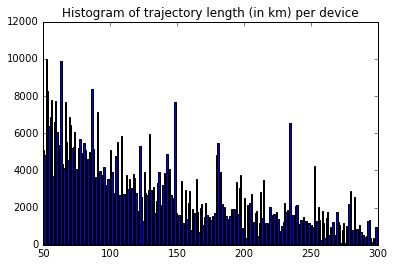

In [51]:
% matplotlib inline
plt.hist(df['traj_len_km'], bins = range(50,300))
plt.title('Histogram of trajectory length (in km) per device')

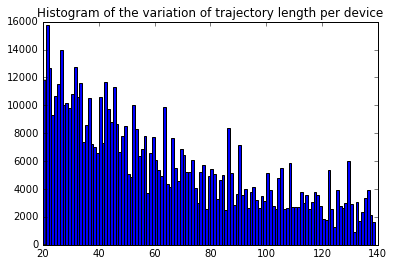

In [26]:
% matplotlib inline
plt.hist(df['traj_len_km'], bins = range(20,140))
plt.title('Histogram of the variation of trajectory length per device')

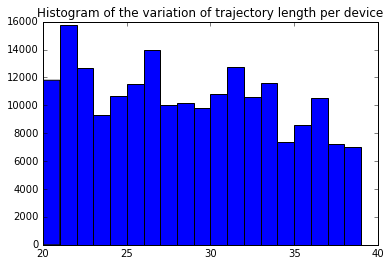

In [27]:
% matplotlib inline
plt.hist(df['traj_len_km'], bins = range(20,40))
plt.title('Histogram of the variation of trajectory length per device')

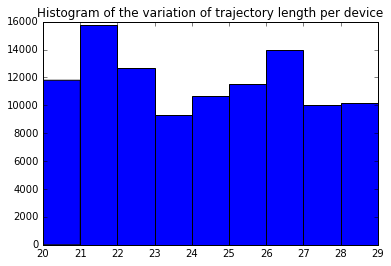

In [28]:
% matplotlib inline
plt.hist(df['traj_len_km'], bins = range(20,30))
plt.title('Histogram of the variation of trajectory length per device')

In [ ]:
device_groups.apply(lambda x: print(x))

ERROR! Session/line number was not unique in         Unnamed: 0  event_id            device_id            timestamp  \
1592288     1592288     74539 -9221825537663503111  2016-05-07 07:52:34   
1592289     1592289     74542 -9221825537663503111  2016-05-07 07:54:27   
1592290     1592290     83976 -9221825537663503111  2016-05-06 07:08:30   
1592291     1592291     84716 -9221825537663503111  2016-05-01 08:50:11   
1592292     1592292     85158 -9221825537663503111  2016-05-05 13:33:32   
1592293     1592293    245033 -9221825537663503111  2016-05-06 07:02:33   
1592294     1592294    296851 -9221825537663503111  2016-05-06 06:52:43   
1592295     1592295    329863 -9221825537663503111  2016-05-06 07:05:49   
1592296     1592296    340952 -9221825537663503111  2016-05-05 07:21:49   
1592297     1592297    341411 -9221825537663503111  2016-05-01 08:45:40   
1592298     1592298    452208 -9221825537663503111  2016-05-05 13:18:38   
1592299     1592299    483166 -9221825537663503111  2016

In [34]:
# Calculate inter-time disrtibutions of events on the same location
def TimeDiff(df):
    df1 = df.sort('timestamp')
    tvalue = df.timestamp
    timediff = tvalue.apply(lambda x: (x - x.shift()).fillna(0))#(df1['tvalue']-df1['tvalue'].shift()).fillna(0)
    tdiff_mins = timediff.apply(lambda x: x / np.timedelta64(1,'m')).astype('int64') % (24*60)
    return sum(tdiff_mins)

geohash12,geohash6 = [], []
for x,y in zip(events_within_china['latitude'],events_within_china['longitude']):
    geohash12.append(geohash.encode(x,y))
    geohash6.append(geohash.encode(x,y,6))
events_within_china['geohash_6'] = geohash6
events_within_china['geohash_12'] = geohash12

device_geohash_groups = events_within_china.groupby(['device_id','geohash_6'])
for name,group in device_geohash_groups:
    group.duration = TimeDiff(group)

event_id            device_id           timestamp  longitude  latitude  \
0         1    29182687948017175 2016-05-01 00:55:25     121.38     31.24   
1         2 -6401643145415154744 2016-05-01 00:54:12     103.65     30.97   
2         3 -4833982096941402721 2016-05-01 00:08:05     106.60     29.70   
3         4 -6815121365017318426 2016-05-01 00:06:40     104.27     23.28   
4         5 -5373797595892518570 2016-05-01 00:07:18     115.88     28.66   

  geohash_6    geohash_12  
0    wtw3dp  wtw3dp44nypf  
1    wm98nt  wm98ntgtk43w  
2    wm7bcw  wm7bcwxz0130  
3    wk4hkt  wk4hktzpg4e1  
4    wt47hc  wt47hcmhxenx

### Find most frequently occurring geohashes using FPGrowth Model from Spark MLLib

In [8]:
# Setup a Spark instance from Anaconda Python framework through the interface PySpark
# Use Machine Learning Library MLLib from Pyspark
spark_home = os.environ.get('SPARK_HOME', None)
sys.path.append(spark_home + "/python")
sys.path.append(os.path.join(spark_home, 'python/lib/py4j-0.9-src.zip'))

filename = os.path.join(spark_home, 'python/pyspark/shell.py')
exec(compile(open(filename, "rb").read(), filename, 'exec'))

from pyspark.mllib.fpm import FPGrowth
from pyspark.mllib.clustering import KMeans

print('Spark instance running..')

ValueError: Cannot run multiple SparkContexts at once; existing SparkContext(app=pyspark-shell, master=local[*]) created by <module> at <ipython-input-4-eee8839d01b4>:8 

In [10]:
#Read the training data
train = pd.read_csv('data/gender_age_train.csv')
df = pd.read_csv('./data/devices_traj_len_more_than_5_km')
df['geohash_11'] = df['geohash'].apply(lambda x : x[:-1])
df['geohash_10'] = df['geohash'].apply(lambda x : x[:-2])
df['geohash_9'] = df['geohash'].apply(lambda x : x[:-3])
df['geohash_8'] = df['geohash'].apply(lambda x : x[:-4])
df['geohash_7'] = df['geohash'].apply(lambda x : x[:-5])
df['geohash_6'] = df['geohash'].apply(lambda x : x[:-6])
df['geohash_5'] = df['geohash'].apply(lambda x : x[:-7])
df['geohash_4'] = df['geohash'].apply(lambda x : x[:-8])
df['geohash_3'] = df['geohash'].apply(lambda x : x[:-9])
df['geohash_2'] = df['geohash'].apply(lambda x : x[:-10])
df['geohash_1'] = df['geohash'].apply(lambda x : x[:-11])
#join the training data with geohashes along with timestamp and construct an RDD
data = df.merge(train, on = 'device_id', how = 'inner')
# Remove NA from data
data = data.dropna(how='any').drop_duplicates()
print (data.shape)
print (data.columns)

(654192, 22)
Index(['Unnamed: 0', 'event_id', 'device_id', 'timestamp', 'longitude',
       'latitude', 'traj_len_km', 'geohash', 'geohash_11', 'geohash_10',
       'geohash_9', 'geohash_8', 'geohash_7', 'geohash_6', 'geohash_5',
       'geohash_4', 'geohash_3', 'geohash_2', 'geohash_1', 'gender', 'age',
       'group'],
      dtype='object')


In [11]:
# Create training dataset with a format that FPGrowthModel understands
print('Generating Frequent itemsets with geohash precision between 12 and 6 characters ..')
count=7
i=13
while (count < 14):
    train_data = data.iloc[:,[2,count,19,20,21]]
    i -=1
    #Generate Frequent geohashes for different precison from 12 to 6
    filename = 'training_data_geohash_'+str(i)+'.txt'
    train_data.to_csv(filename, sep = ' ', index = False, header = False)
    rdd = sc.textFile(filename)
    transactions = rdd.map(lambda line: line.strip().split(' '))
    unique = transactions.map(lambda x: list(set(x))).cache()
    model = FPGrowth.train(unique, minSupport=0.00009, numPartitions=4)#0.00009
    result = model.freqItemsets().collect()
    outfilename = 'freqItemSets_train_data_geohash_'+str(i)+'.txt'
    outfile = open(outfilename, 'w')
    for item in result:
        outfile.write("%s\n" % str(item))
    count +=1
print('Frequent Itemsets generated!\n')
print(result[0])

Generating Frequent itemsets with geohash precision between 12 and 6 characters ..
Frequent Itemsets generated!

FreqItemset(items=['8499055549315459187'], freq=91)


In [161]:
# Pick the sets with freq>100 and parse it into a pandas data frame to apply LDA model for clustering

text_file = open("freqItemSets_train_data_geohash_12.txt", "r")
freqitems = text_file.read().split('\n')
validitems = []
for item in freqitems:
    if len(item)>85:
        validitems.append(item)
        
print(len(freqitems),len(validitems))

freqsets = []
for item in validitems:
    # if the string matches the word 'freq' pick the value starting from '=' until ')'
    x = re.search("freq", item).end()
    
    # convert the extracted value to a number and check if it is > 50
    item1 = int(item[x+1:len(item)-1])
    #print(item1)
    if item1>50:
        freqsets.append(item)
print('\nStructure of Frequent itemset:\n', freqsets[0])
# Write all those freqitemsets which have geohash,device_id,age,gender 
# and group combinations with freq > 50 to csv file
newitems = []
for item in freqsets:
    x = int(re.search("]",item).start())
    group = item[19:x]
    freq = item[x+8:len(item)-1]
    newitem = group + ', ' + freq
    newitems.append(newitem)
outfile = open('freqItemSets_geohash_12__freq_above_50_train_data.csv', 'w')
for item in newitems:
    if len(item)>53: #63 for 12-char geohash
        outfile.write("%s\n" % str(item))
outfile.close()
print('\nFormatted frequent itemset: \n',newitems[0])

61921 2479

Structure of Frequent itemset:
 FreqItemset(items=['ws0qgy4ehbkp', '8013522094297086491', '20', 'F23-', 'F'], freq=65)

Formatted frequent itemset: 
 'ws0qgy4ehbkp', '8013522094297086491', '20', 'F23-', 'F', 65


In [162]:
# For those items in the freqitemsets where device_id comes before geohash, swap the values
datadir = './Frequent_Geohashes'
df = pd.read_csv('freqItemSets_geohash_12__freq_above_50_train_data.csv', header = None)
df1 = df   
print('Creating a pandas dataframe using the frequently occurring geohashes..')
print('\n Number of frequent itemsets :',df1.shape[0],'\n')
#Format the string by removing extra spaces and quotes
df1[0] = df1[0].map(lambda x: x.lstrip(' \'').rstrip('\''))
df1[1] = df1[1].map(lambda x: x.lstrip(' \'').rstrip('\''))
df1[2] = df1[2].map(lambda x: x.lstrip(' \'').rstrip('\''))
df1[3]= df1[3].map(lambda x: x.lstrip(' \'').rstrip('\''))
df1[4]= df1[4].map(lambda x: x.lstrip(' \'').rstrip('\''))
df1.columns = ['geohash_12','device_id','age','group','gender','freq']

#print(df1.head())
print('\nRearranging data correctly from frequent itemsets..')
# Reshuffle geohash, device_id and age,group columns to synchronise the data
for i in range(0,len(df1)):
    if len(df1.iloc[i,0])>15:
        #print('\n',df1.iloc[i,0])
        df1.iloc[i,0], df1.iloc[i,1] = df1.iloc[i,1], df1.iloc[i,0]
    if len(df1.iloc[i,2])>2:
        #print('\n',df1.iloc[i,2],df1.iloc[i,3])
        df1.iloc[i,2],df1.iloc[i,3] = df1.iloc[i,3], df1.iloc[i,2]
        #print('\n',df1.iloc[i,2],df.iloc[i,3])

print('\nReshuffling complete..')
df1.to_csv('freqItemSets_geohash_12__freq_above_50_train_data.csv')
df1.head()

Creating a pandas dataframe using the frequently occurring geohashes..

 Number of frequent itemsets : 2479 


Rearranging data correctly from frequent itemsets..

Reshuffling complete..


geohash_12            device_id age   group gender   freq
0  ws0qgy4ehbkp  8013522094297086491  20    F23-      F   65.0
1  wx4fcrtdreh6  6419933246028865045  23  M23-26      M   62.0
2  wwfwz4svv3nz  5391163715596884624  36  F33-42      F  137.0
3  ww7v380mpp2x   777480779757651131  37  F33-42      F   65.0
4  wthsbbn2pz23  1559994277771029954  54    M39+      M   66.0

In [148]:
df1=pd.read_csv('freqItemSets_geohash_12__freq_above_50_train_data.csv')
df1=df1[['geohash_12','device_id','age','group','gender','freq']]
df1.head()

geohash_12            device_id  age   group gender   freq
0  ws0qgy4ehbkp  8013522094297090000   20    F23-      F   65.0
1  wx4fcrtdreh6  6419933246028870000   23  M23-26      M   62.0
2  wwfwz4svv3nz  5391163715596880000   36  F33-42      F  137.0
3  ww7v380mpp2x   777480779757651000   37  F33-42      F   65.0
4  wthsbbn2pz23  1559994277771030000   54    M39+      M   66.0

In [70]:
df1.iloc[18,0], df1.iloc[18,1] = df1.iloc[18,1], df1.iloc[18,0]

In [71]:
df1.iloc[42,0], df1.iloc[42,1] = df1.iloc[42,1], df1.iloc[42,0]
df1.iloc[59,0], df1.iloc[59,1] = df1.iloc[59,1], df1.iloc[59,0]
df1.iloc[19,0], df1.iloc[19,1] = df1.iloc[19,1], df1.iloc[19,0]
df1.iloc[50,0], df1.iloc[50,1] = df1.iloc[50,1], df1.iloc[50,0]

In [72]:
df1.iloc[18,2], df1.iloc[18,3] = df1.iloc[18,3], df1.iloc[18,2]
df1.iloc[42,2], df1.iloc[42,3] = df1.iloc[42,3], df1.iloc[42,2]
df1.iloc[59,2], df1.iloc[59,3] = df1.iloc[59,3], df1.iloc[59,2]
df1.iloc[19,2], df1.iloc[19,3] = df1.iloc[19,3], df1.iloc[19,2]
df1.iloc[50,2], df1.iloc[50,3] = df1.iloc[50,3], df1.iloc[50,2]

In [165]:
df1.head()

Unnamed: 0    geohash_12            device_id age   group gender   freq
0           0  ws0qgy4ehbkp  8013522094297086491  20    F23-      F   65.0
1           1  wx4fcrtdreh6  6419933246028865045  23  M23-26      M   62.0
2           2  wwfwz4svv3nz  5391163715596884624  36  F33-42      F  137.0
3           3  ww7v380mpp2x   777480779757651131  37  F33-42      F   65.0
4           4  wthsbbn2pz23  1559994277771029954  54    M39+      M   66.0

In [169]:
for i in range(0,len(df1)):
    if len(df1.iloc[i,3])!=2:
        print(i,df1.iloc[i,1],df1.iloc[i,2],df1.iloc[i,3],df1.iloc[i,4],df.iloc[i,5])

76 54 -885670780472164025 F43+ wm3fwt66xtkd 61.0
137 50 -333053721396889656 M39+ wm3fwt66xtkd 83.0
202 18 8156187339546970941 F23- wm3fwt66xtkd 482.0
1288 59 -933992182710246359 M39+ wm3fwt66xtkd 193.0
1592 19 -4246572900250826802 F23- wm3fwt66xtkd 83.0
1723 50 2743353976556364094 F43+ wm3fwt66xtkd 154.0
1790 52 6494115582212837535 M39+ wm3fwt66xtkd 87.0
1990 42 8012501920184449458 M39+ wm3fwt66xtkd 290.0


In [152]:
df1 = pd.read_csv('freqItemSets_geohash_12__freq_above_50_train_data.csv')
df1.columns

Index(['geohash_12', 'device_id', 'age', 'group', 'gender', 'freq'], dtype='object')

In [172]:
#Convert the age and device_id columns to integer type and sort by frequency
df1 = pd.read_csv('freqItemSets_geohash_12__freq_above_50_train_data.csv')
df1 = df1[['geohash_12','device_id','age','group','gender','freq']]
df1['age'] = df1['age'].map(lambda x: int(x))
df1['device_id'] = df1['device_id'].map(lambda x: int(x))
df1 = df1.sort_values(by = 'freq', inplace = False, axis = 0, ascending= False)
print('\nConverting categorical values to numeric values for further analyses.\n \nMale=0 & Female =1')
# Assign numeric values to gender M := 0 and F := 1
for i in range(0,len(df1)):
    if df1.iloc[i,4] == 'M':
        df1.iloc[i,4] = 0
    else:
        df1.iloc[i,4] = 1

#Assign numeric values to groups
print('\nUnique Groups : \n\n M22-: 1, M23-26 : 2, M27-28: 3, M29-31: 4, M32-38: 5, M39+: 6')
print('\n F23-: 7, F24-26 : 8, F27-28: 9, F29-32: 10, F33-42: 11, F43+: 12 ')
for i in range(0,len(df1)):
    if df1.iloc[i,3] == 'M22-':
        df1.iloc[i,3] = 1
    elif df1.iloc[i,3] == 'M23-26':
        df1.iloc[i,3] = 2
    elif df1.iloc[i,3] == 'M27-28':
        df1.iloc[i,3] = 3
    elif df1.iloc[i,3] == 'M29-31':
        df1.iloc[i,3] = 4
    elif df1.iloc[i,3] == 'M32-38':
        df1.iloc[i,3] = 5
    elif df1.iloc[i,3] == 'M39+':
        df1.iloc[i,3] = 6
    elif df1.iloc[i,3] == 'F23-':
        df1.iloc[i,3] = 7
    elif df1.iloc[i,3] == 'F24-26':
        df1.iloc[i,3] = 8
    elif df1.iloc[i,3] == 'F27-28':
        df1.iloc[i,3] = 9
    elif df1.iloc[i,3] == 'F29-32':
        df1.iloc[i,3] = 10
    elif df1.iloc[i,3] == 'F33-42':
        df1.iloc[i,3] = 11
    elif df1.iloc[i,3] == 'F43+':
        df1.iloc[i,3] = 12
df1.to_csv('formatted_freqItemSets_train_geohash_12_05022017.csv', index = False)
df1.head()


Converting categorical values to numeric values for further analyses.
 
Male=0 & Female =1

Unique Groups : 

 M22-: 1, M23-26 : 2, M27-28: 3, M29-31: 4, M32-38: 5, M39+: 6

 F23-: 7, F24-26 : 8, F27-28: 9, F29-32: 10, F33-42: 11, F43+: 12 


geohash_12            device_id  age group gender    freq
680   wqptdu1xjj2s -8340098378141155823   28     3      0  3745.0
426   wxrvcth55t0c -3746248670824158209   46     6      0  2592.0
1293  wwcb375hb3b4  5375599021847302819   47    12      1  2444.0
2305  wkzn6tuwhb63 -6242501228649113250   20     1      0  2441.0
954   wt3mbj1e4vp1  1779631023439405334   39    11      1  2233.0

#### Fit the data to LDA model to classify locations based on gender

In [173]:
# features : device_id, geohash, age, gender,frequency of geohashes
# groups : ['M23-26', 'M27-28', 'M29-31', 'M32-38', 'F24-26', 'F27-28', 'F29-32', 'F33-42']
# numbers assigned to groups : [1,2,3,4,5,6,7,8]
# gender : M ==> 0 , F ==> 1
df_FPG = df1[['geohash_12','device_id','age','group','gender','freq']]
print('Most frequently visited geohashes:',df_FPG.shape[0])

#Prepare the dataset for fitting to LDA model
#convert geohash to int
geohash_int = []
for item in df_FPG['geohash_12']:
    x = geohash.base32_to_int(item)
    geohash_int.append(x)

df_FPG['geohash_int'] = geohash_int
X = df_FPG[['geohash_int','device_id','age','freq','group']].values
y = np.array(df_FPG['gender'].tolist())
test_size = np.arange(0.2,0.6,0.01)
#print('\nClass Labels: Male=0, Female = 1')
score=[]
for i in test_size:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state = 0)
    # Invoke LDA model from scikit-learn 
    clf = LDA(solver ='lsqr',shrinkage='auto') 
    # Fit the data to LDA model
    fit = clf.fit(X_train,y_train)
    score.append(fit.score(X_test,y_test))
    # Predict confidence scores for samples.
    decision_func = fit.decision_function(X_test)
    #print('\nConfidence scores = ',decision_func)
    #print('\ntrain_test_split = ',int((1-i)*100),':',int(i*100))
    #print('\nModel Parameters:',clf.get_params(deep=True))
    #print('\nPredicted Classes: ',clf.predict(X_test))
    #print('\nPredict Log probability: ',clf.predict_log_proba(X_test))
    #print('\nModel Score:',fit.score(X_test,y_test))
plt.plot(test_size*100,np.array(score),lw=4)
plt.xlabel('Test size (%)')
plt.ylabel('Mean Prediction accuracy score(0-1)')

Most frequently visited geohashes: 2479


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

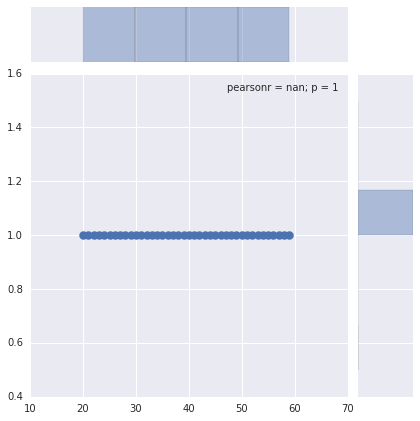

In [120]:
import seaborn as sns
sns.jointplot(test_size*100,np.array(score),lw=4)

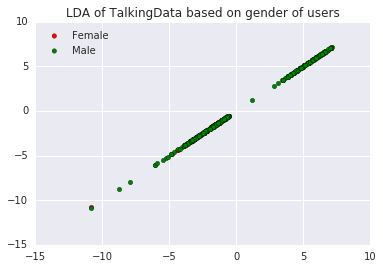

In [121]:
import matplotlib.pyplot as plt
%matplotlib inline
clf = LDA().fit(X,y)
X_r2 = clf.transform(X)
#print(X_r2)
plt.figure()
for c, i, target_name in zip("rg", [1, 0],["Female","Male"]):
    #print(c,i,X_r2[y_train == i],)
    plt.scatter(X_r2[y_train == i], X_r2[y_train == i], c=c, label=target_name)
plt.legend(loc='upper left')
plt.title('LDA of TalkingData based on gender of users')

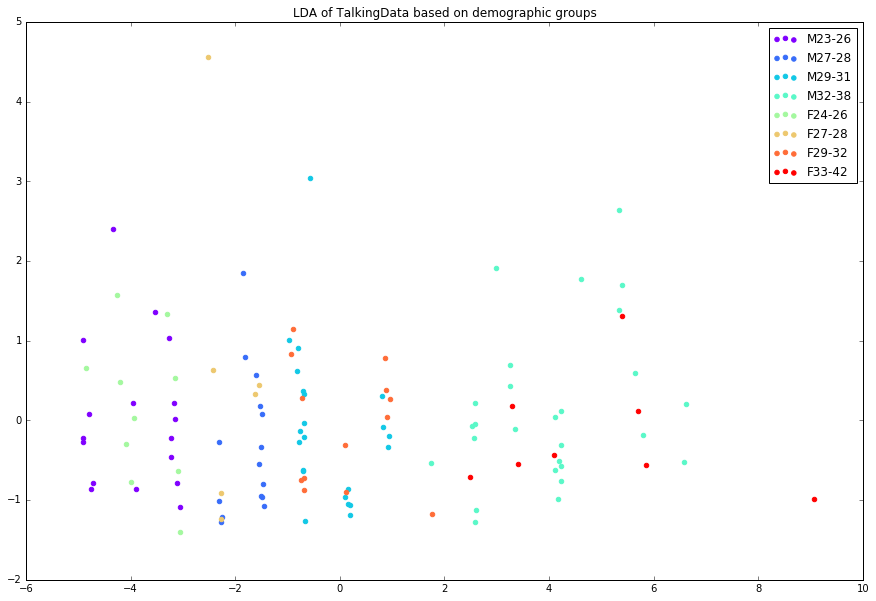

In [5]:
# Visualise the fitted data

X = df_FPG[['device_id','age','freq','gender']].values
y = np.array(df_FPG['group'].tolist())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.7)
target_names = np.array(['M23-26', 'M27-28', 'M29-31', 'M32-38', 'F24-26', 'F27-28', 'F29-32', 'F33-42'])
lda = LDA()
X_r2 = lda.fit(X_train,y_train).transform(X_train)
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, 8))
plt.figure(figsize=(15,10))
for c,i, target_name in zip(colors,[1,2,3,4,5,6,7,8], target_names):
    plt.scatter(X_r2[y_train == i, 0], X_r2[y_train == i, 1], color=c, label=target_name)
plt.legend()
plt.title('LDA of TalkingData based on demographic groups')

In [6]:
clf.fit(X_train,y_train).score(X_test,y_test)

0.66787003610108309

In [108]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [105]:
"{0:.4f}".format(0.9876)

'0.9876'

Normalized confusion matrix
[[ 1.    0.  ]
 [ 0.05  0.95]]


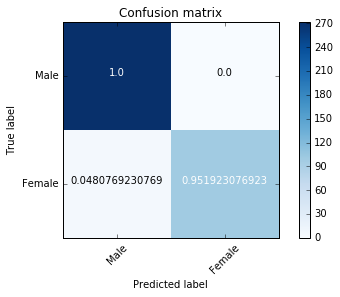

In [109]:
# Plot non-normalized confusion matrix


X = df_FPG[['device_id','age','freq','group','geohash_int']].values
y = np.array(df_FPG['gender'].tolist())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.95)

y_pred = LDA().fit(X_train, y_train).predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
class_names = np.array(['Male','Female'])

np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix', normalize = True)
plt.show()

Normalized confusion matrix
[[ 0.9   0.1   0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.53  0.47  0.    0.    0.    0.    0.  ]
 [ 0.    0.    1.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.11  0.83  0.    0.    0.    0.06]
 [ 0.87  0.13  0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.78  0.22  0.    0.    0.    0.    0.  ]
 [ 0.    0.    1.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.58  0.    0.    0.    0.42]]


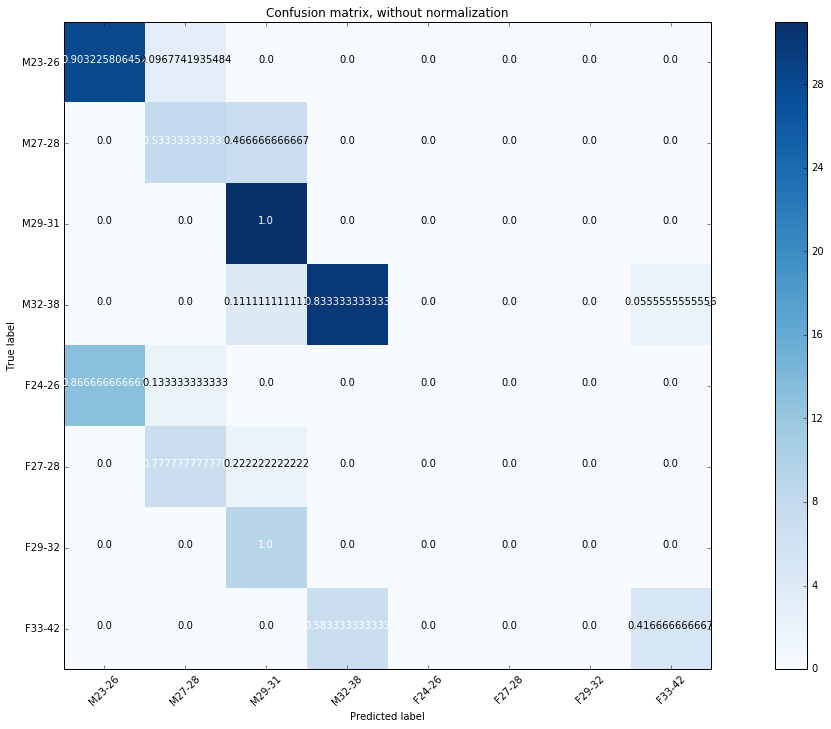

In [103]:
# Plot non-normalized confusion matrix for classifiers - Groups
from sklearn.metrics import confusion_matrix

X = df_FPG[['device_id','age','freq','gender','geohash_int']].values
y = np.array(df_FPG['group'].tolist())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

y_pred = LDA().fit(X_train, y_train).predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
class_names = np.array(['M23-26', 'M27-28', 'M29-31', 'M32-38', 'F24-26', 'F27-28', 'F29-32', 'F33-42'])

np.set_printoptions(precision=2)

plt.figure(figsize = (18,10))
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization', normalize = True)
plt.show()

In [176]:
#Create a Python RDD to apply KMeans to the dataset with geohashes and cluster the data to find similar features
# starting with 2 clusters
from pyspark.mllib.clustering import KMeans
data = sc.parallelize(df_FPG[['device_id','age','freq','gender']].values)
model1 = KMeans.train(data, 2, maxIterations=10, initializationMode="random",
                     seed=50, initializationSteps=5, epsilon=1e-4)
print('Cluster Centers: \n', model1.clusterCenters)
print('\nCost function: ', model1.computeCost(data))

Cluster Centers: 
 [array([ -6.99e+18,   3.05e+01,   2.42e+02,   2.70e-01]), array([ -2.65e+18,   3.03e+01,   2.74e+02,   2.91e-01])]

Cost function:  7.478869720291477e+38


In [177]:
# Varying the number of clusters between 1 and 10 to reduce the cost function
k = [0 for x in range(11)]
cost = [0 for x in range(11)]
result = []
for i in range(1,11):
    model = KMeans.train(data, i, maxIterations=10, initializationMode="random",
                     seed=50, initializationSteps=5, epsilon=1e-4)
    k[i] = i
    cost[i] = model.computeCost(data)
    result.append((k[i],cost[i])) 
result

[(1, 2.602594569196169e+39),
 (2, 7.478869720291477e+38),
 (3, 4.449356404885407e+38),
 (4, 2.9887863205450604e+38),
 (5, 1.5357119694294837e+38),
 (6, 2.0759395690716937e+38),
 (7, 7.966594512445137e+37),
 (8, 6.4954964840093355e+37),
 (9, 5.388716085569013e+37),
 (10, 5.212606509870864e+37)]

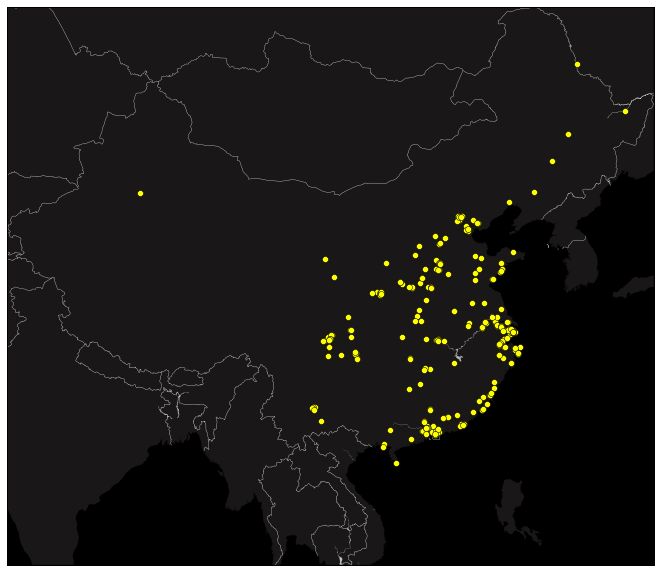

In [11]:
#Separate the data for Male population
df_M = df_FPG.query('gender==0')

# Decode the geohashes to extract user locations for Male population
lat = []
lon = []
for item in df_M['geohash']:
    lat.append(float(geohash.decode(item)[0]))
    lon.append(float(geohash.decode(item)[1]))

    
# Plot the data on a basemap
from mpl_toolkits.basemap import Basemap
fig = plt.figure(figsize=(15, 10))
map1 = Basemap(projection='merc',
              llcrnrlon = 73.557701,              # lower-left corner longitude
              llcrnrlat = 10.77539,               # lower-left corner latitude
              urcrnrlon = 134.773605,               # upper-right corner longitude
              urcrnrlat = 53.5606,               # upper-right corner latitude
              resolution = 'h',
              area_thresh = 100000.0,
              )

map1.fillcontinents(color='#191717',lake_color='#bdbdbd') 
map1.drawmapboundary(fill_color='#000000')                
map1.drawcountries(linewidth=0.3, color="w") 
x, y = map1(lon, lat)

map1.plot(x, y, 
            'o',                    # marker shape
            color='Yellow',         # marker colour
            markersize=6            # marker size
            )

plt.show()

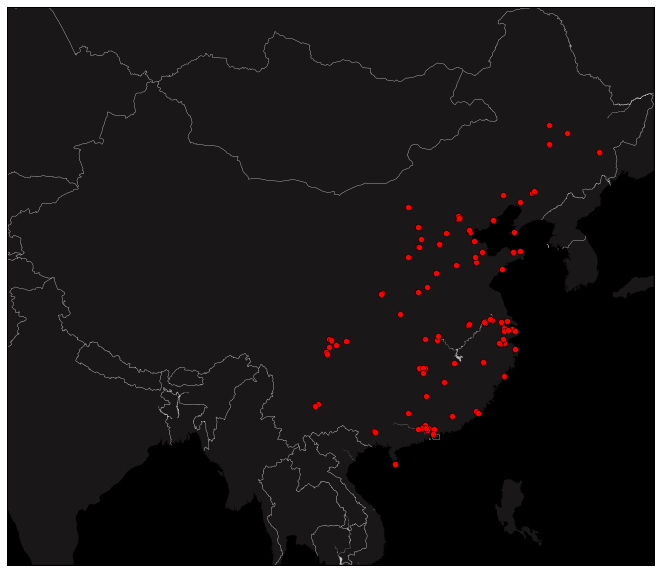

In [12]:
# Decode the geohashes to extract user locations for Female population
df_F = df_FPG.query('gender==1')
lat = []
lon = []
for item in df_F['geohash']:
    lat.append(float(geohash.decode(item)[0]))
    lon.append(float(geohash.decode(item)[1]))
    

fig = plt.figure(figsize=(15, 10))
map1 = Basemap(projection='merc',
              llcrnrlon = 73.557701,              # lower-left corner longitude
              llcrnrlat = 10.77539,               # lower-left corner latitude
              urcrnrlon = 134.773605,               # upper-right corner longitude
              urcrnrlat = 53.5606,               # upper-right corner latitude
              resolution = 'h',
              area_thresh = 100000.0,
              )

map1.fillcontinents(color='#191717',lake_color='#bdbdbd') 
map1.drawmapboundary(fill_color='#000000')                
map1.drawcountries(linewidth=0.3, color="w") 

x, y = map1(lon, lat)
map1.plot(x, y, 
            'o',                    # marker shape
            color='Red',         # marker colour
            markersize=6            # marker size
            )

plt.show()

In [185]:
#Check th enumber of unique age values
print(df_M['age'].unique())

# Group them in categories 
# Cluster each group separately on the map
import folium
map1 = folium.Map(location=[34.74, 111.38], tiles='Stamen Toner',zoom_start=5)
marker_cluster1 = folium.MarkerCluster("M20-25").add_to(map1)
marker_cluster2 = folium.MarkerCluster("M26-30").add_to(map1)
marker_cluster3 = folium.MarkerCluster("M31-35").add_to(map1)
marker_cluster4 = folium.MarkerCluster(">M35").add_to(map1)

for each in df_M.iterrows():
    #print((each[1][11]))
    if (each[1][2]>=23) & (each[1][2]<=26):
        popup1 = 'M23-26'
        folium.Marker(list(geohash.decode(each[1][11])), popup=popup1).add_to(marker_cluster1)
    elif (each[1][2]>=27) & (each[1][2]<=28):
        popup2 = 'M27-28'
        folium.Marker(list(geohash.decode(each[1][11])), popup=popup2).add_to(marker_cluster2)
    elif (each[1][2]>=29) & (each[1][2]<=31):
        popup3 = 'M29-31'
        folium.Marker(list(geohash.decode(each[1][11])), popup=popup3).add_to(marker_cluster3)
    else:
        popup4 = 'M32-38'
        folium.Marker(list(geohash.decode(each[1][11])), popup=popup4).add_to(marker_cluster4)
map1.save("./df_M_clusters.html")    
map1

[28 36 38 24 35 26 29 30 31 37 25 34 32 33 23 27]


In [78]:
print(df_F['age'].unique())
map2 = folium.Map(location=[34.74, 111.38], tiles='Stamen Toner',zoom_start=5)
marker_cluster1 = folium.MarkerCluster("F24-26").add_to(map2)
marker_cluster2 = folium.MarkerCluster("F27-28").add_to(map2)
marker_cluster3 = folium.MarkerCluster("F29-32").add_to(map2)
marker_cluster4 = folium.MarkerCluster("F33-42").add_to(map2)

for each in df_F.iterrows():
    if (each[1][2]>=24) & (each[1][2]<=26):
        popup1 = 'F24-26'
        folium.Marker(list(geohash.decode(each[1][0])), popup=popup1).add_to(marker_cluster1)
    elif (each[1][2]>=27) & (each[1][2]<=28):
        popup2 = 'F27-28'
        folium.Marker(list(geohash.decode(each[1][0])), popup=popup2).add_to(marker_cluster2)
    elif (each[1][2]>=29) & (each[1][2]<=32):
        popup3 = 'F29-32'
        folium.Marker(list(geohash.decode(each[1][0])), popup=popup3).add_to(marker_cluster3)
    else:
        popup4 = 'F33-42'
        folium.Marker(list(geohash.decode(each[1][0])), popup=popup4).add_to(marker_cluster4)
    #print(each[1][0],geohash.decode(each[1][0]),each[1][0][:-3],geohash.decode(each[1][0][:-6]))
map2.save("./df_F_clusters.html")    
map2

[39 28 34 37 33 27 36 25 29 41 26 32 30 35 24 38 31]


In [13]:
# Convert the geohashes to bit representation and store them as long/int
geohash_int = []
for item in df_M['geohash']:
    x = geohash.base32_to_int(item)
    geohash_int.append(x)
    
df_M['geohash_int'] = geohash_int
df_M.head()

geohash            device_id  age  group  gender  freq  \
0  wqptdu1xjj2s -8340098378141155823   28      2       0  3745   
2  wwc2kg4sb3f6  4782582047729166353   36      4       0  2126   
3  wtb59r7wyjg5  5098778421671837341   38      4       0  2003   
4  wqj5yccx13h1  3074308677943390456   24      1       0  1491   
6  wtwn2bwyw2fk  1522573667677189193   35      4       0  1091   

           geohash_int  
0   258585673583059544  
2  4162111414401833414  
3  8297060547130460645  
4   129272597895353217  
6  1037961116001374674

0.931937172775


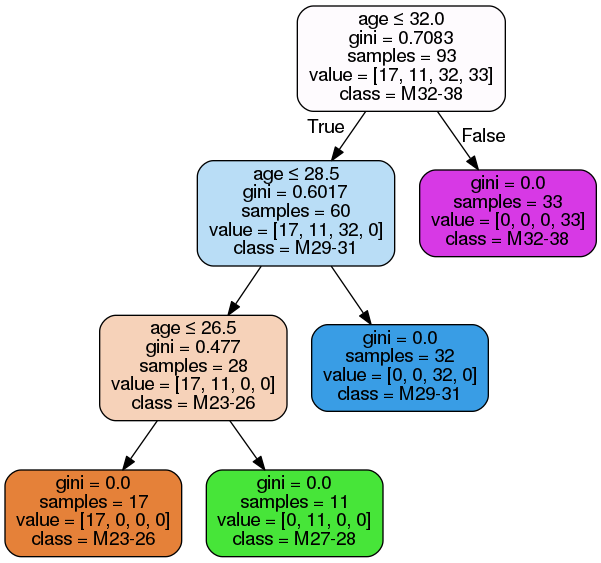

In [44]:
# Now that we can visualise the age-group clusters, we can try and fit the data to a decision tree and try to predict 
# age for Male and Female population from the frequently occurring geohashes

# X : [decoded geohashes at different granularities, device id, age, freq]
# y : [group]
# Visualise the results of the decision tree
import pydotplus
from IPython.display import Image 
from sklearn import tree
from sklearn.cross_validation import train_test_split
df_M_decoded_geohash = df_M
#for each in df_M_decoded_geohash
X = df_M[['geohash_int','device_id','age','freq','gender']].values
y = df_M['group'].values
X_train_M, X_test_M, y_train_M, y_test_M = train_test_split(X, y, test_size=.67)
clf = tree.DecisionTreeClassifier()
clf_M = clf.fit(X_train_M,y_train_M)
y_pred_M = clf_M.predict(X_test_M)
score = clf_M.score(X_test_M,y_test_M)
print(score)
 

features = ['geohash_int','device_id','age','freq','gender']
classes = np.array(['M23-26', 'M27-28', 'M29-31', 'M32-38'])
with open("Tree_df_M.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f,
                            feature_names=features,  
                            class_names=classes,  
                            filled=True, rounded=True,  
                            special_characters=True)

graph = pydotplus.graphviz.graph_from_dot_file("Tree_df_M.dot")
graph.write_pdf("Tree_df_M.pdf")
Image(graph.create_png())

Normalized confusion matrix
[[ 1.    0.    0.    0.  ]
 [ 0.    1.    0.    0.  ]
 [ 0.    0.    1.    0.  ]
 [ 0.    0.    0.18  0.82]]


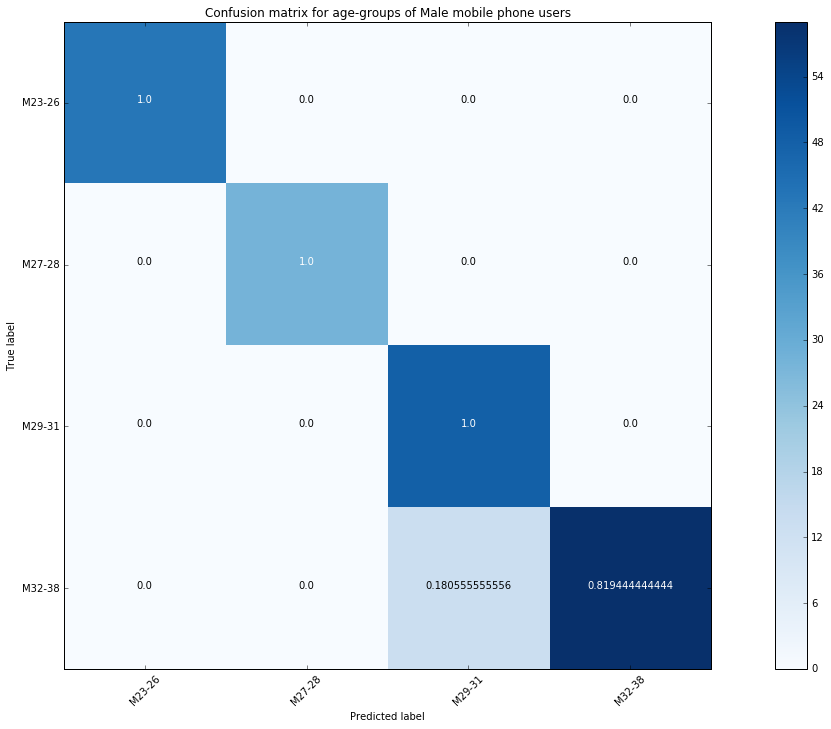

In [45]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
import matplotlib.pyplot as plt
% matplotlib inline

y_pred_M = clf_M.predict(X_test_M)

cnf_matrix = confusion_matrix(y_test_M, y_pred_M)
class_names = np.array(['M23-26', 'M27-28', 'M29-31', 'M32-38'])

np.set_printoptions(precision=2)
plt.figure(figsize = (18,10))
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix for age-groups of Male mobile phone users', normalize = True)
plt.show()

0.882978723404


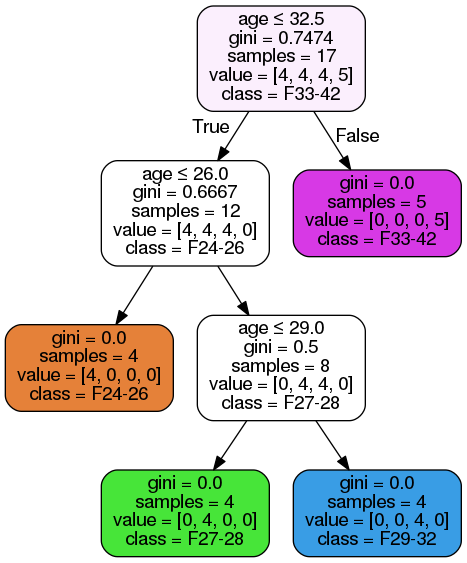

In [74]:
df_F_decoded_geohash = df_F
#for each in df_M_decoded_geohash
X = df_F[['geohash_int','device_id','age','freq','gender']].values
y = df_F['group'].values
X_train_F, X_test_F, y_train_F, y_test_F = train_test_split(X, y, test_size=0.84)
clf_F = clf.fit(X_train_F,y_train_F)
y_pred_F = clf_F.predict(X_test_F)
score = clf_F.score(X_test_F,y_test_F)
print(score)

features = ['geohash_int','device_id','age','freq','gender']
classes = np.array(['F24-26', 'F27-28', 'F29-32', 'F33-42'])
with open("Tree_df_F.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f,
                            feature_names=features,  
                            class_names=classes,  
                            filled=True, rounded=True,  
                            special_characters=True)

graph = pydotplus.graphviz.graph_from_dot_file("Tree_df_F.dot")
graph.write_pdf("Tree_df_F.pdf")
Image(graph.create_png())

Normalized confusion matrix
[[ 1.    0.    0.    0.  ]
 [ 0.    1.    0.    0.  ]
 [ 0.    0.46  0.54  0.  ]
 [ 0.    0.    0.    1.  ]]


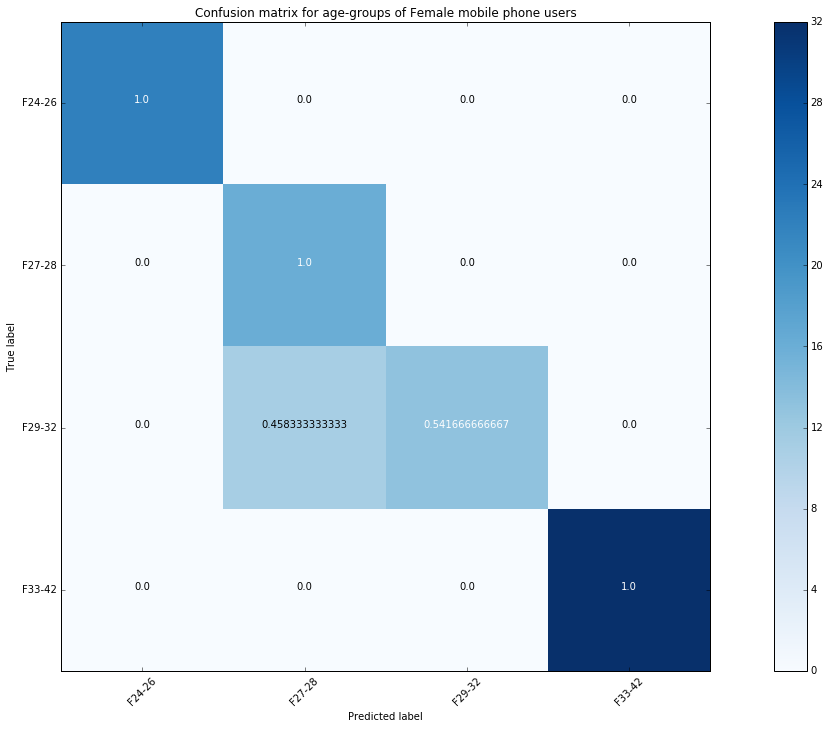

In [75]:
y_pred_F = clf_F.predict(X_test_F)

cnf_matrix = confusion_matrix(y_test_F, y_pred_F)
class_names = np.array(['F24-26', 'F27-28', 'F29-32', 'F33-42'])

np.set_printoptions(precision=2)

plt.figure(figsize = (18,10))
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix for age-groups of Female mobile phone users', normalize = True)
plt.show()

In [ ]:
#Look for correlations and try to add regional factors 
# that can impact the outcome of this model
import pandas as pd
events = pd.read_csv('./data/events.csv')
train = pd.read_csv('./data/gender_age_train.csv')
app_events = pd.read_csv('./data/app_events.csv')
labels = pd.read_csv('./data/label_categories.csv')
app_labels = pd.read_csv('./data/app_labels.csv')

# Using only those devices available in the training data

train_events = events.merge(train, on='device_id', how='inner')
train_events['timestamp'] = pd.to_datetime(train_events.timestamp)
train_events['hour'] = train_events.timestamp.apply(lambda x: x.hour)
app_train_events = train_events.merge(app_events, on='event_id', how='inner')

#using only apps that appears in the train set

app_train_labels = app_train_events.merge(app_labels, on='app_id', how='inner')

In [ ]:
print(train_events.shape,app_train_events.shape,app_train_labels.shape)

In [ ]:
app_train_labels.head()

In [ ]:
import json
with open('./data/POI_cafes_china.geojson') as f:
    cafes = json.load(f)
cafe_geohashes, poi_type=[],[]
for feature in cafes['features']:
    x = feature['geometry']['coordinates'][0]
    y = feature['geometry']['coordinates'][1]
    if (x>104 and x<134) and (y>36 and y<55):
        cafe_geohashes.append(geohash.encode(y,x))
        poi_type.append('cafe')

df1 = pd.DataFrame({'geohash': cafe_geohashes,
                    'poi_type' : poi_type})
        
with open('./data/POI_shopping_malls_china.geojson') as f:
    malls = json.load(f)
malls_geohashes,poi_type=[],[]
for feature in malls['features']:
    x = feature['geometry']['coordinates'][0]
    y = feature['geometry']['coordinates'][1]
    if (x>104 and x<134) and (y>36 and y<55):
        malls_geohashes.append(geohash.encode(y,x))
        poi_type.append('shopping_malls')

df2 = pd.DataFrame({'geohash': malls_geohashes,
                    'poi_type' : poi_type})
        
with open('./data/POI_parks_china.geojson') as f:
    parks = json.load(f)
parks_geohashes, poi_type=[],[]
for feature in parks['features']:
    x = feature['geometry']['coordinates'][0]
    y = feature['geometry']['coordinates'][1]
    if (x>104 and x<134) and (y>36 and y<55):
        parks_geohashes.append(geohash.encode(y,x))
        poi_type.append('parks')
        
df3 = pd.DataFrame({'geohash': parks_geohashes,
                    'poi_type' : poi_type})

with open('./data/POI_fitness_centre_china.geojson') as f:
    fitctr = json.load(f)
fitctr_geohashes, poi_type=[],[]
for feature in fitctr['features']:
    x = feature['geometry']['coordinates'][0]
    y = feature['geometry']['coordinates'][1]
    if (x>104 and x<134) and (y>36 and y<55):
        fitctr_geohashes.append(geohash.encode(y,x))
        poi_type.append('fitness_center')
        
df4 = pd.DataFrame({'geohash': fitctr_geohashes,
                    'poi_type' : poi_type})

with open('./data/POI_fast_food_china.geojson') as f:
    fastfood = json.load(f)
fastfood_geohashes, poi_type=[],[]
for feature in fastfood['features']:
    x = feature['geometry']['coordinates'][0]
    y = feature['geometry']['coordinates'][1]
    if (x>104 and x<134) and (y>36 and y<55):
        fastfood_geohashes.append(geohash.encode(y,x))
        poi_type.append('fast_food_joint')
        
df5 = pd.DataFrame({'geohash': fastfood_geohashes,
                    'poi_type' : poi_type})

with open('./data/POI_cinemas_china.geojson') as f:
    cinemas = json.load(f)
cinemas_geohashes, poi_type=[], []
for feature in cinemas['features']:
    x = feature['geometry']['coordinates'][0]
    y = feature['geometry']['coordinates'][1]
    if (x>104 and x<134) and (y>36 and y<55):
        cinemas_geohashes.append(geohash.encode(y,x))
        poi_type.append('movie_theatre')

df6 = pd.DataFrame({'geohash': cinemas_geohashes,
                    'poi_type' : poi_type})

with open('./data/POI_pubs_china.geojson') as f:
    pubs = json.load(f)
pubs_geohashes,poi_type=[],[]
for feature in pubs['features']:
    x = feature['geometry']['coordinates'][0]
    y = feature['geometry']['coordinates'][1]
    if (x>104 and x<134) and (y>36 and y<55):
        pubs_geohashes.append(geohash.encode(y,x))
        poi_type.append('nightclubs')

df7 = pd.DataFrame({'geohash': pubs_geohashes,
                    'poi_type' : poi_type})

poi_df = pd.concat([df1,df2,df3,df4,df5,df6,df7])
        
print('cafes',len(cafe_geohashes))
print('shopping malls',len(malls_geohashes))
print('parks',len(parks_geohashes))
print('fitnesscenter',len(fitctr_geohashes))
print('fastfood',len(fastfood_geohashes))
print('cinemas',len(cinemas_geohashes))
print('pubs',len(pubs_geohashes))

poi_df.head()

In [ ]:
poi_df.shape[0]

In [ ]:
# Generate a timeseries for each device
df_FPG = pd.read_csv('formatted_freqItemSets_train.csv')
#Separate the data based on gender
df_M = df_FPG.query('gender==0')
df_F = df_FPG.query('gender==1')

# Select timestamp for those devices in the frequent items list
freq_geo_ts = df_FPG.merge(events_within_china)

In [ ]:
import folium

map_1 = folium.Map(location=[lat[0], lon[0]],zoom_start=6,tiles='Stamen Toner')

for item in zip(lat,lon):
    folium.Marker([item[0],item[1]],
                  popup='Cafes',
                  icon=folium.Icon(icon='coffee',
                                   prefix='fa',
                                   color='darkred')).add_to(map_1)
    #print(item[1])
import ibmgeohashpy
from ibmgeohashpy import geohash
for item in df_M['geohash']:
    geolat = geohash.decode(item)[0]
    geolon = geohash.decode(item)[1]
    folium.Marker([geolat,geolon],
                  popup=item,
                  icon=folium.Icon(icon='male',
                                   prefix='fa',
                                   color='blue')).add_to(map_1)
for item in df_F['geohash']:
    geolat = geohash.decode(item)[0]
    geolon = geohash.decode(item)[1]
    folium.Marker([geolat,geolon],
                  popup=item,
                  icon=folium.Icon(icon='female',
                                   prefix='fa',
                                   color='orange')).add_to(map_1)
#map_1